In [ ]:
import pandas as pd
df = pd.read_csv("reddit_mh_parallel_with_comments.csv")

In [ ]:
df.head()

id                                title  \
0  1m61kf6  i've hit a new level of self-hatred   
1  1m61jkl                        I’m exhausted   
2  1m617pa                what IS wrong with me   
3  1m60z18             am i actually depressed?   
4  1m60v0v              Why do I feel like this   

                                            selftext   created_utc  \
0  26M(with job) - like the title said i'm growin...  1.753149e+09   
1  I have anxiety that is ruined my life I can’t ...  1.753149e+09   
2  i think there’s something wrong with me and i ...  1.753148e+09   
3  i have felt depressed since my teenage years. ...  1.753147e+09   
4  Yeah idk how to start but man my life is good....  1.753147e+09   

   num_comments  score   subreddit            author  \
0             0      1  depression  Fat_Jack_The_Bat   
1             0      1  depression        unknown17-   
2             0      1  depression    SweetenedMelon   
3             0      1  depression  brokbackmountain   
4             0      1  depression         yvngtorta   

                                                 url comments  
0  https://www.reddit.com/r/depression/comments/1...      NaN  
1  https://www.reddit.com/r/depression/comments/1...      NaN  
2  https://www.reddit.com/r/depression/comments/1...      NaN  
3  https://www.reddit.com/r/depression/comments/1...      NaN  
4  https://www.reddit.com/r/depression/comments/1...      NaN

In [ ]:
df.shape

(19063, 10)

In [ ]:
# Count of missing values per column
missing_counts = df.isnull().sum()

# Percentage of missing values per column
missing_percentage = (missing_counts / len(df)) * 100

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage.round(2)
})

# Display columns with any missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
print(missing_summary)


          Missing Count  Missing Percentage (%)
selftext            282                    1.48
author              302                    1.58
comments           3643                   19.11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19063 entries, 0 to 19062
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            19063 non-null  object 
 1   title         19063 non-null  object 
 2   selftext      18781 non-null  object 
 3   created_utc   19063 non-null  float64
 4   num_comments  19063 non-null  int64  
 5   subreddit     19063 non-null  object 
 6   author        18761 non-null  object 
 7   url           19063 non-null  object 
 8   comments      15420 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


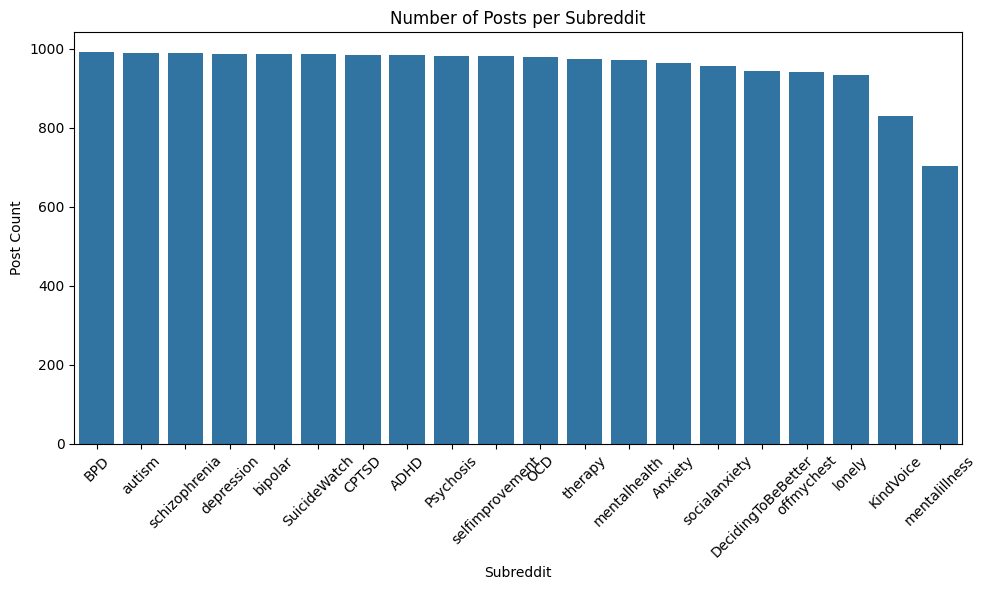

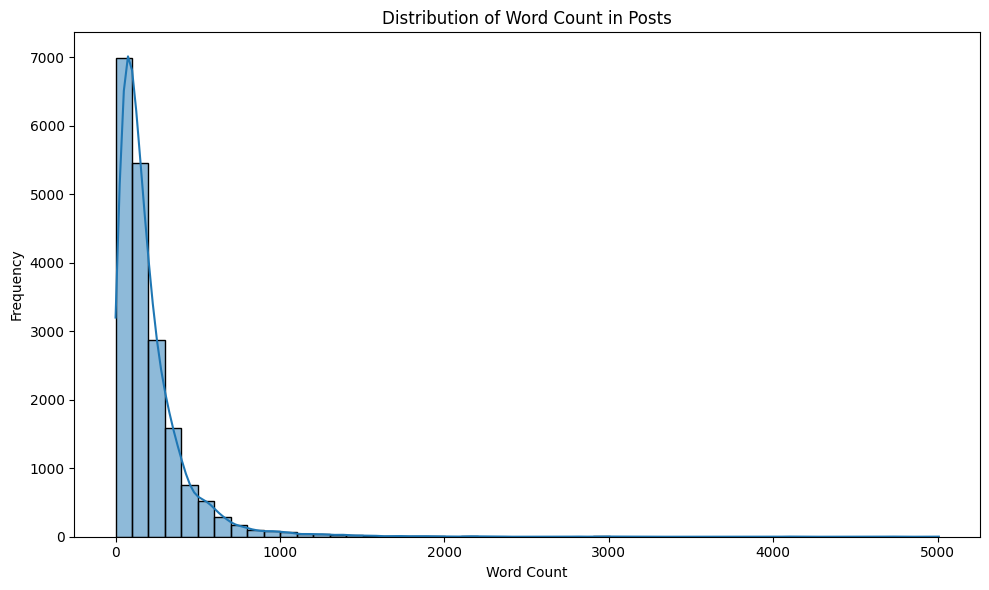

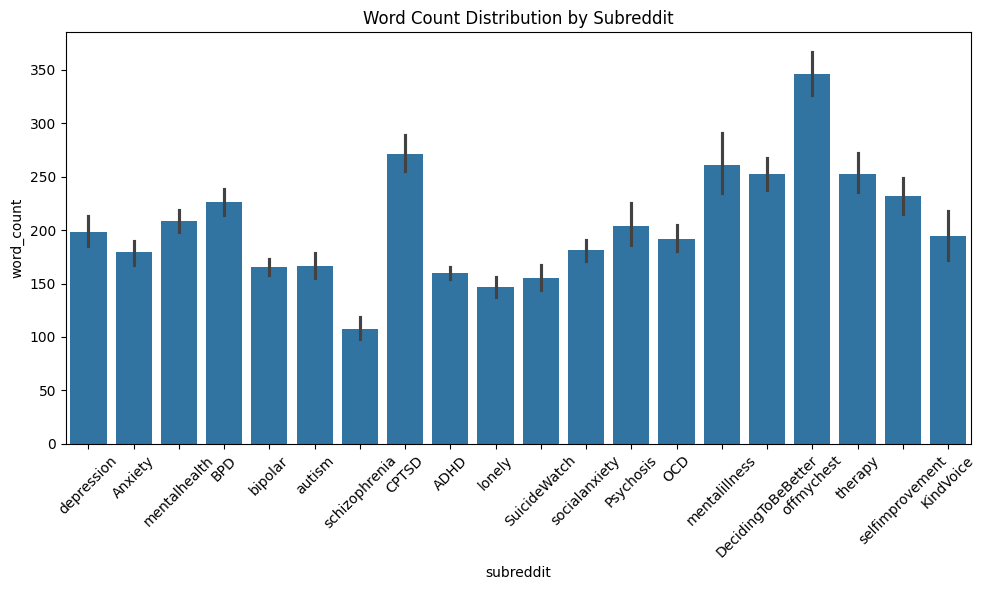

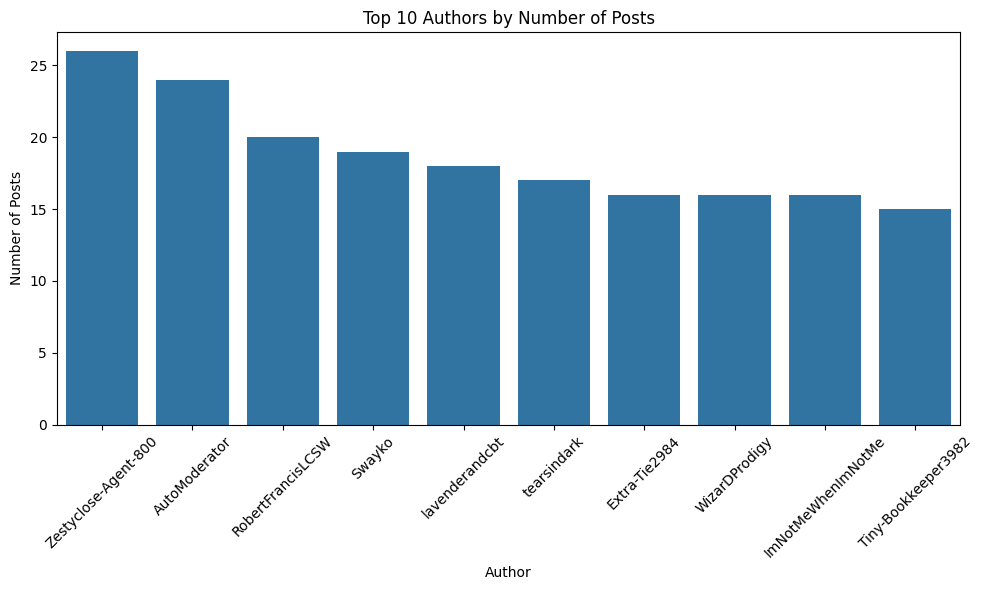

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import re

# Drop 'score' if still exists
df = df.drop(columns=[col for col in df.columns if 'score' in col.lower()], errors='ignore')

# Basic information
basic_info = df.info()

# Distribution of posts per subreddit
subreddit_counts = df['subreddit'].value_counts()

# Top authors by number of posts
top_authors = df['author'].value_counts().head(10)

# Distribution of post lengths
df['post_length'] = df['selftext'].astype(str).apply(len)

# Word count distribution
df['word_count'] = df['selftext'].astype(str).apply(lambda x: len(re.findall(r'\w+', x)))

# Create visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values)
plt.xticks(rotation=45)
plt.title("Number of Posts per Subreddit")
plt.ylabel("Post Count")
plt.xlabel("Subreddit")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Distribution of Word Count in Posts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='subreddit', y='word_count', data=df)
plt.xticks(rotation=45)
plt.title("Word Count Distribution by Subreddit")
plt.tight_layout()
plt.show()

# Top authors plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.xticks(rotation=45)
plt.title("Top 10 Authors by Number of Posts")
plt.ylabel("Number of Posts")
plt.xlabel("Author")
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download these once
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')


# Load dataset
df = pd.read_csv("reddit_mh_parallel_with_comments.csv")

# Drop rows where both 'title' and 'selftext' are missing
df.dropna(subset=['title', 'selftext'], how='all', inplace=True)

# Set up NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

# Apply to title, selftext and comments
df['processed_title'] = df['title'].apply(preprocess_text)
df['processed_selftext'] = df['selftext'].apply(preprocess_text)
df['processed_comments'] = df['comments'].apply(preprocess_text) # Added preprocessing for comments


# Save output
df.to_csv("reddit_mh_parallel_preprocessed.csv", index=False)

KeyboardInterrupt: 

In [ ]:
df_clean = pd.read_csv("reddit_mh_parallel_preprocessed-2.csv")

In [ ]:
df_clean.head()

id                                title  \
0  1m61kf6  i've hit a new level of self-hatred   
1  1m61jkl                        I’m exhausted   
2  1m617pa                what IS wrong with me   
3  1m60z18             am i actually depressed?   
4  1m60v0v              Why do I feel like this   

                                            selftext   created_utc  \
0  26M(with job) - like the title said i'm growin...  1.753149e+09   
1  I have anxiety that is ruined my life I can’t ...  1.753149e+09   
2  i think there’s something wrong with me and i ...  1.753148e+09   
3  i have felt depressed since my teenage years. ...  1.753147e+09   
4  Yeah idk how to start but man my life is good....  1.753147e+09   

   num_comments  score   subreddit            author  \
0             0      1  depression  Fat_Jack_The_Bat   
1             0      1  depression        unknown17-   
2             0      1  depression    SweetenedMelon   
3             0      1  depression  brokbackmountain   
4             0      1  depression         yvngtorta   

                                                 url comments  \
0  https://www.reddit.com/r/depression/comments/1...      NaN   
1  https://www.reddit.com/r/depression/comments/1...      NaN   
2  https://www.reddit.com/r/depression/comments/1...      NaN   
3  https://www.reddit.com/r/depression/comments/1...      NaN   
4  https://www.reddit.com/r/depression/comments/1...      NaN   

                processed_title  \
0  ive hit new level selfhatred   
1                     exhausted   
2                         wrong   
3            actually depressed   
4                     feel like   

                                  processed_selftext processed_comments  
0  job like title said growing hate new level bas...                NaN  
1  anxiety ruined life alone leave house without ...                NaN  
2  think something wrong know explain feel words ...                NaN  
3  felt depressed since teenage years sometimes d...                NaN  
4  yeah idk start man life good like amazing good...                NaN

/tmp/ipython-input-9-1922578834.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_counts.values, y=subreddit_counts.index, palette="viridis")


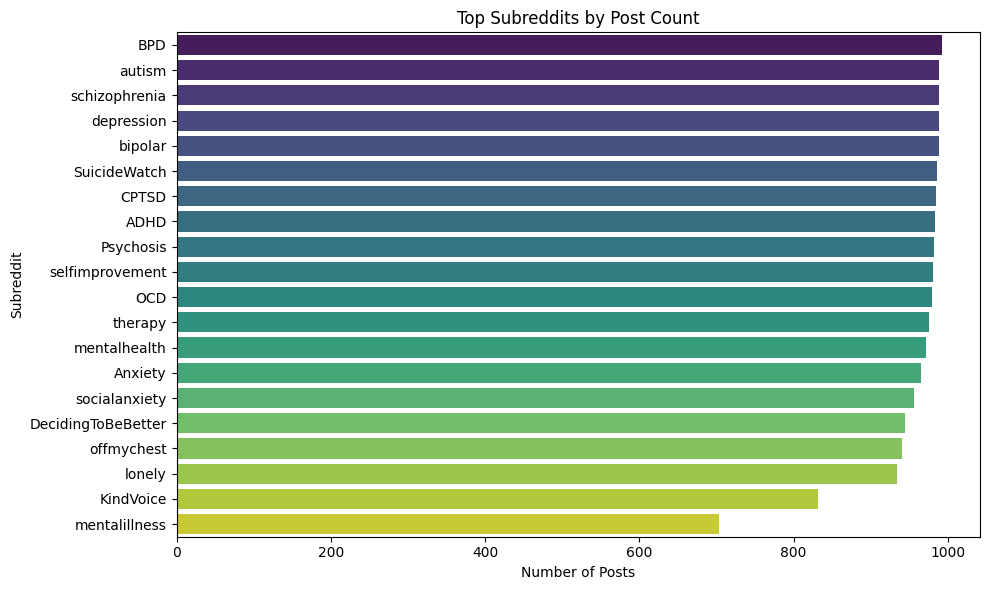

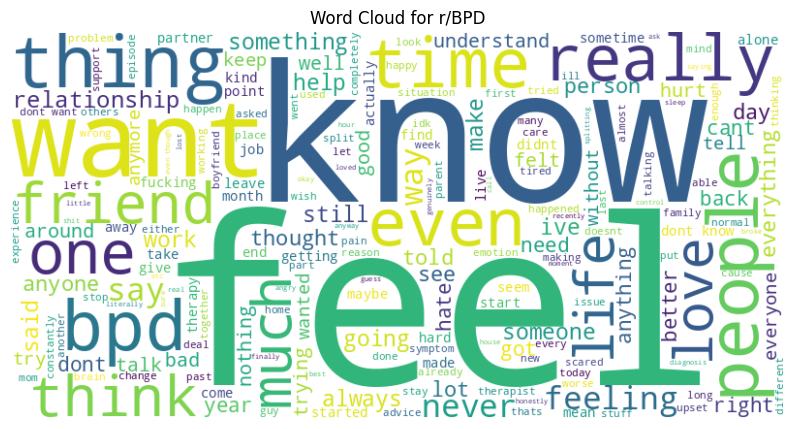

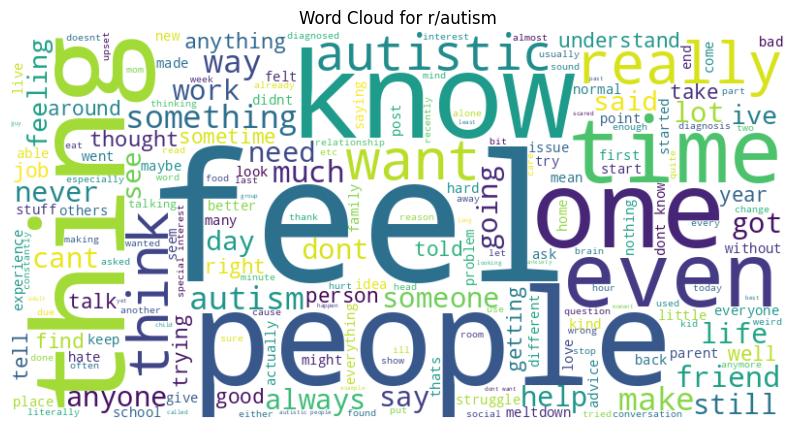

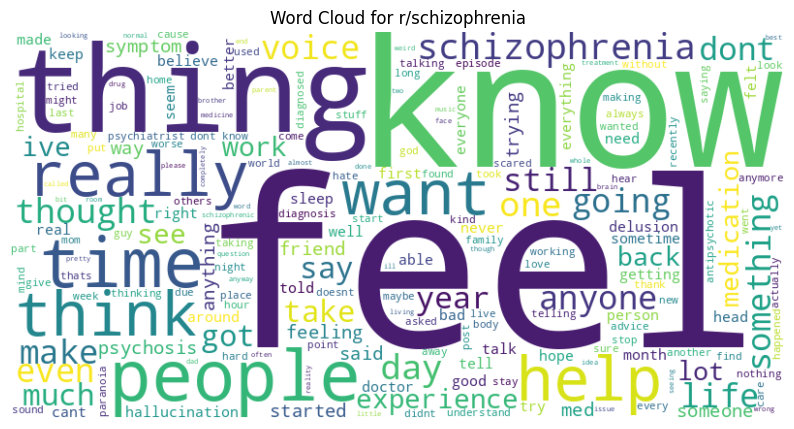

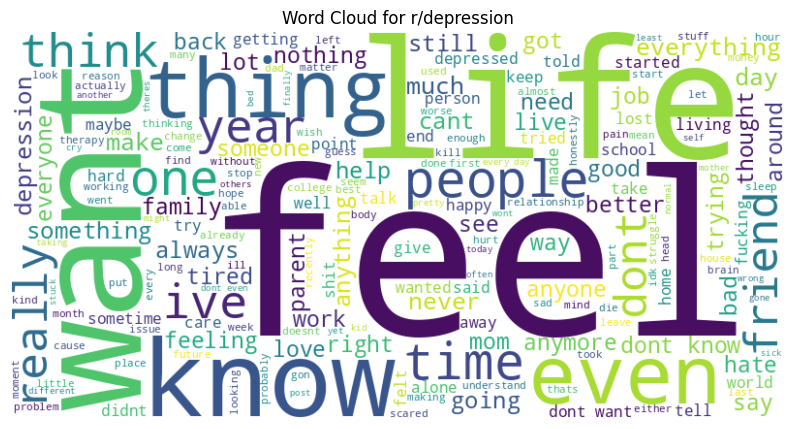

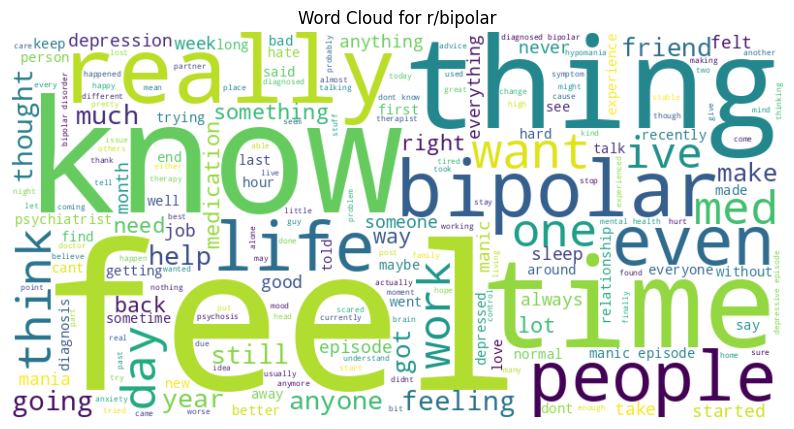

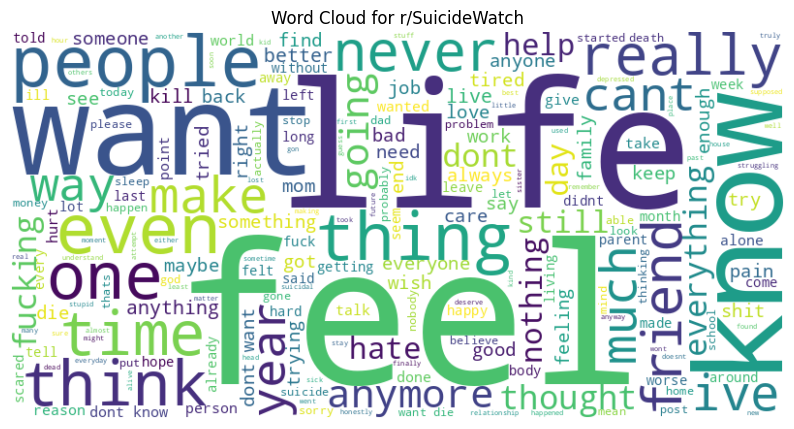

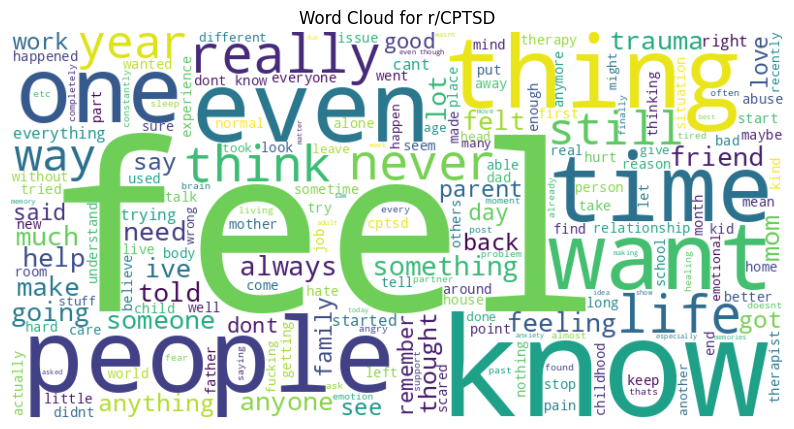

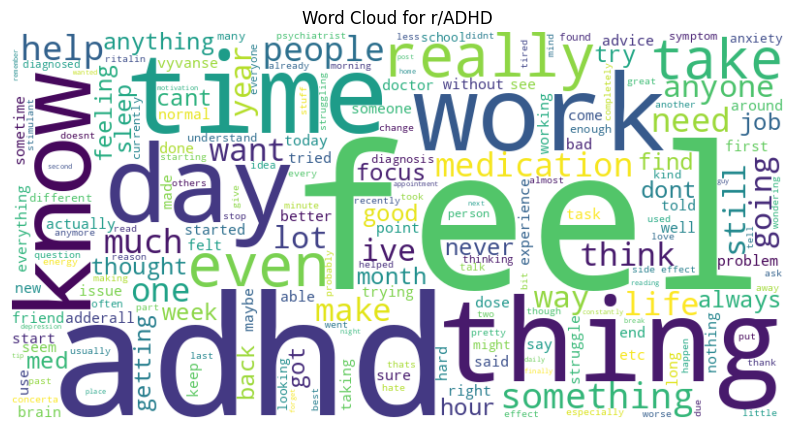

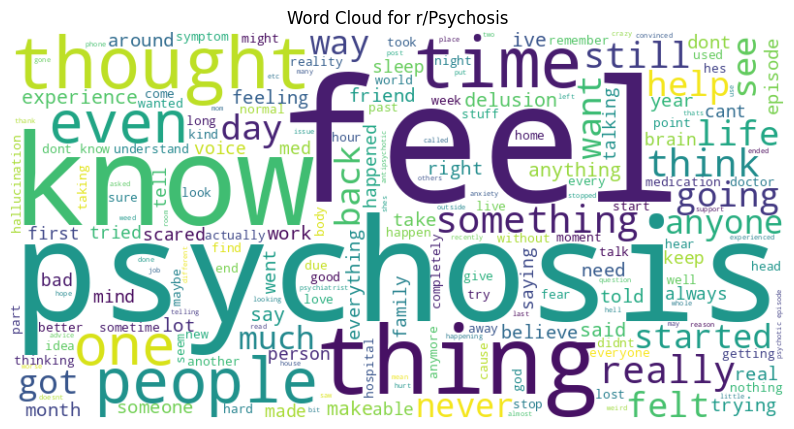

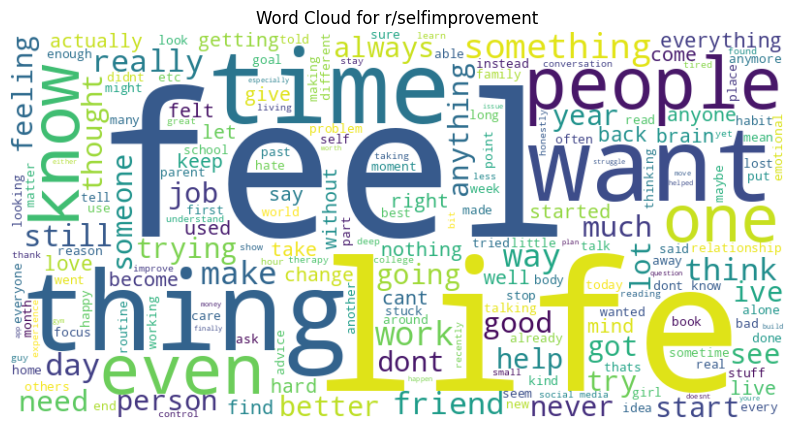

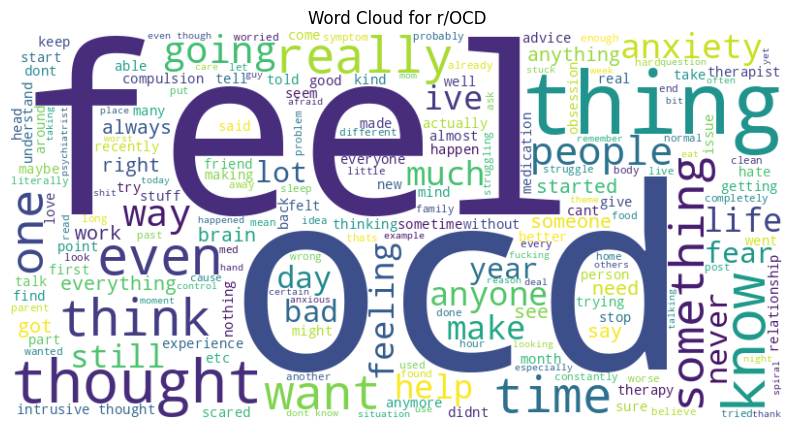

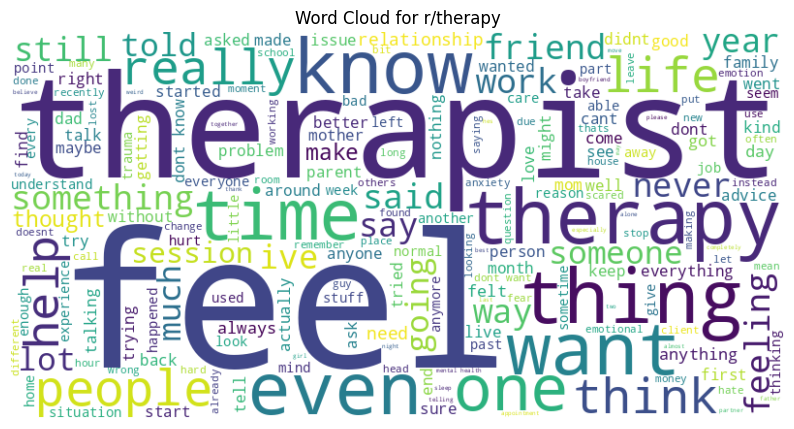

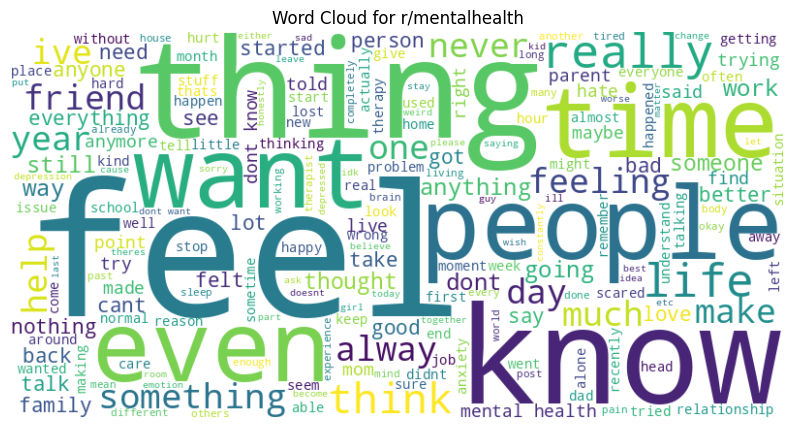

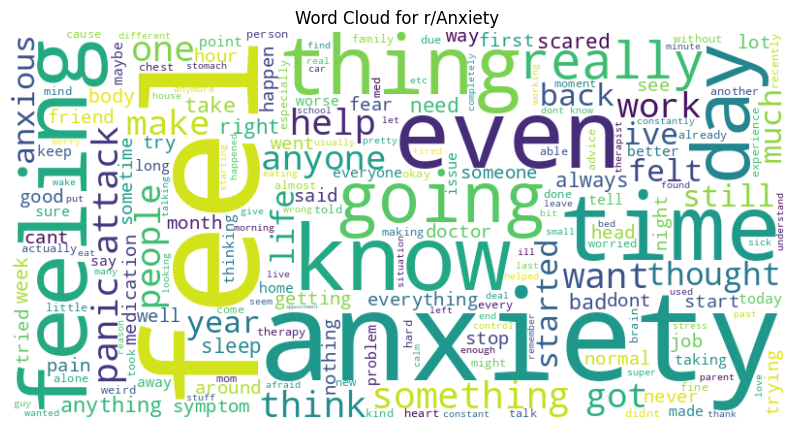

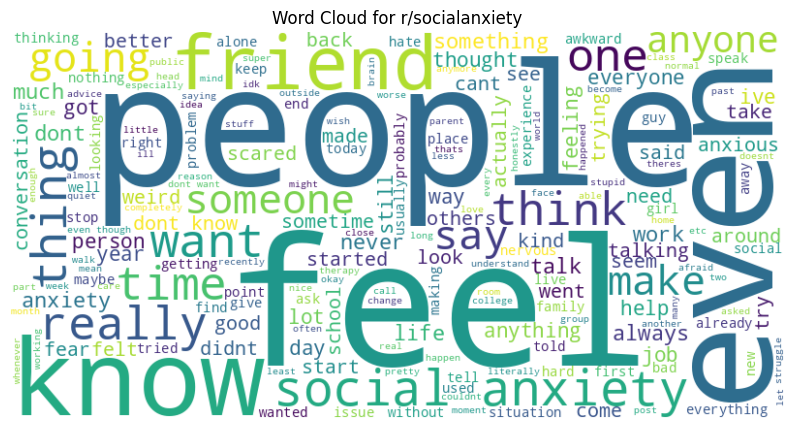

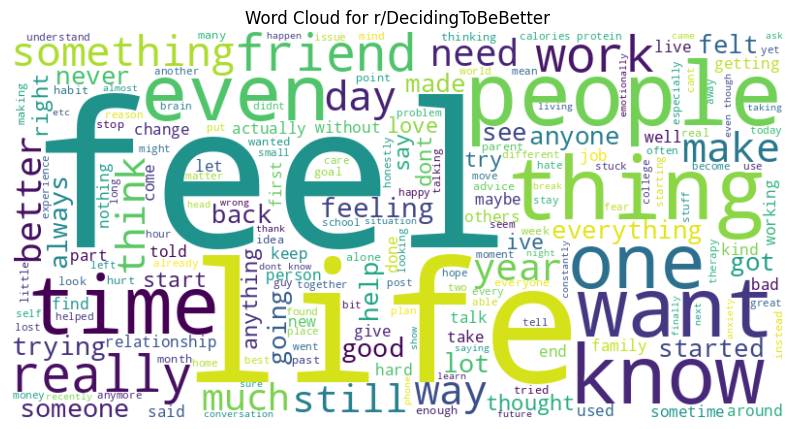

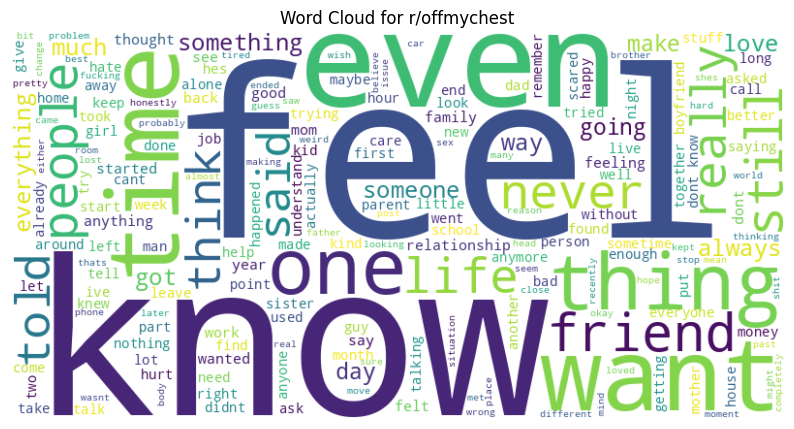

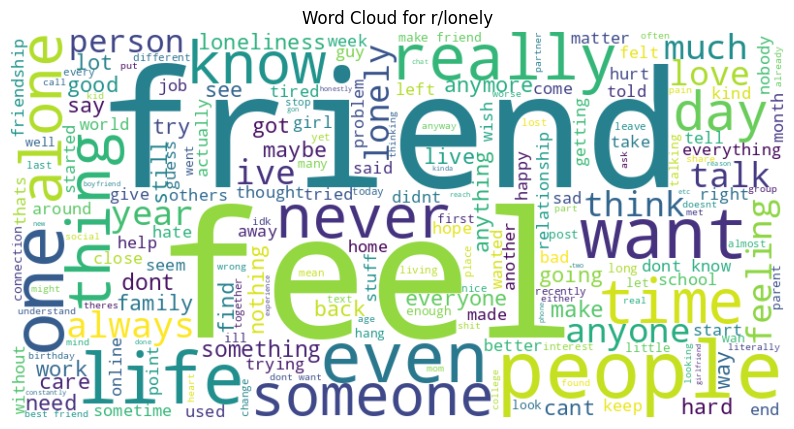

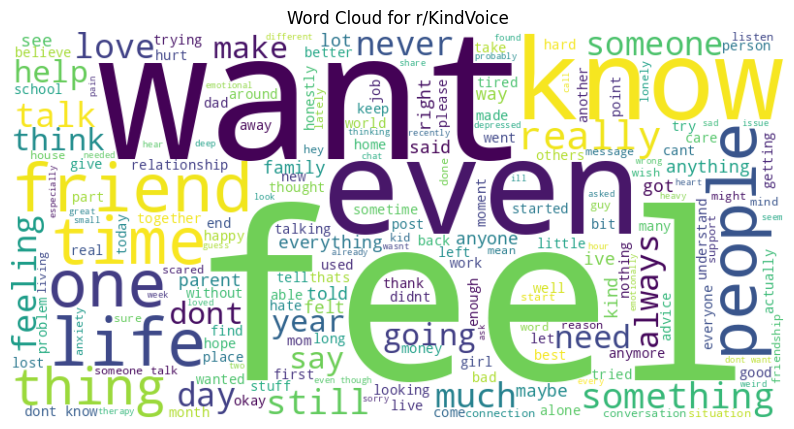

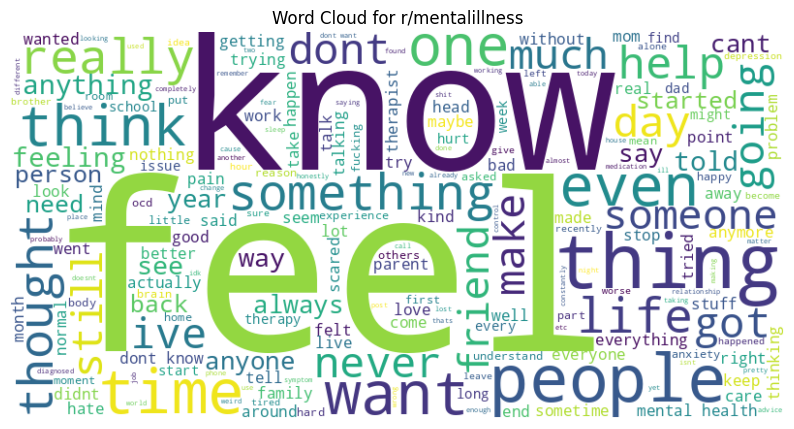

''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df_clean = pd.read_csv("reddit_mh_parallel_preprocessed-2.csv")

# Drop rows with missing subreddit or processed text
df_clean.dropna(subset=['subreddit', 'processed_selftext'], inplace=True)

# Count posts per subreddit
subreddit_counts = df['subreddit'].value_counts()

# Plot top subreddits by post count
plt.figure(figsize=(10, 6))
sns.barplot(x=subreddit_counts.values, y=subreddit_counts.index, palette="viridis")
plt.title("Top Subreddits by Post Count")
plt.xlabel("Number of Posts")
plt.ylabel("Subreddit")
plt.tight_layout()
plt.show()

# Generate and plot word clouds per subreddit
for subreddit in subreddit_counts.index:
    text = " ".join(df_clean[df_clean['subreddit'] == subreddit]['processed_selftext'].dropna())
    if text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for r/{subreddit}")
        plt.show()
''

/tmp/ipython-input-10-2114183894.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_counts.head(10).values, y=subreddit_counts.head(10).index, palette="viridis")


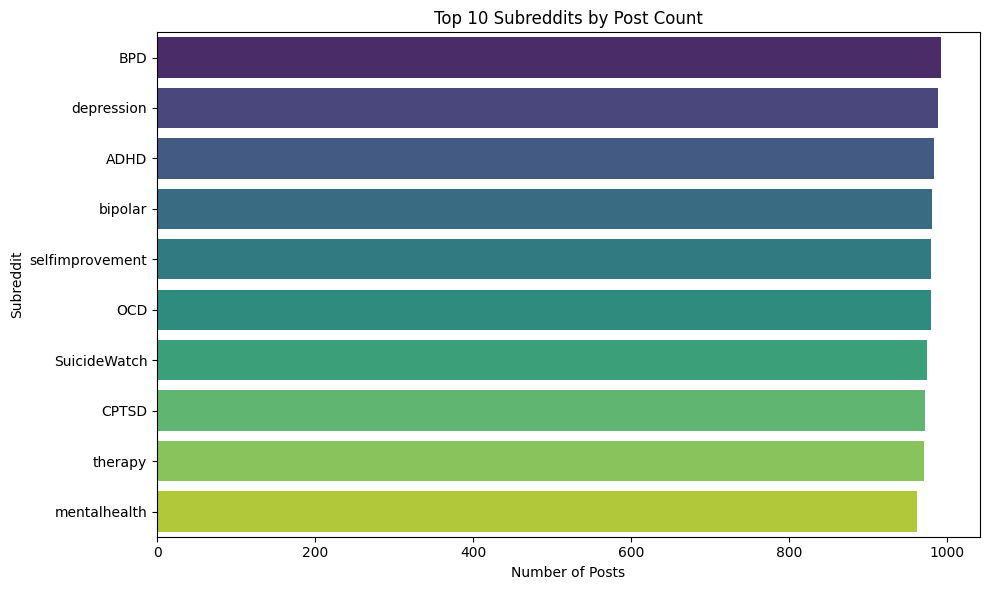

Metric         Value
0              Total Posts  18719.000000
1           Missing Titles      0.000000
2        Missing Selftexts      0.000000
3         Missing Comments   3584.000000
4     Average Title Length      4.227737
5  Average Selftext Length     91.172285
6   Average Comment Length    186.125487

from matplotlib import pyplot as plt
basic_df['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
basic_df.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
basic_df['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(basic_df['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(basic_df, x='Value', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Metric')):
  _plot_series(series, series_name, i)
  fig.legend(title='Metric', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Value', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display

# Overview of the dataset
basic_info = {
    "Total Posts": len(df_clean),
    "Missing Titles": df_clean['title'].isnull().sum(),
    "Missing Selftexts": df_clean['selftext'].isnull().sum(),
    "Missing Comments": df_clean['comments'].isnull().sum(),
    "Average Title Length": df_clean['processed_title'].apply(lambda x: len(str(x).split())).mean(),
    "Average Selftext Length": df_clean['processed_selftext'].apply(lambda x: len(str(x).split())).mean(),
    "Average Comment Length": df_clean['processed_comments'].apply(lambda x: len(str(x).split())).mean(),
}

# Number of posts per subreddit
subreddit_counts = df_clean['subreddit'].value_counts()

# Plot: Top 10 subreddits by post count
plt.figure(figsize=(10, 6))
sns.barplot(x=subreddit_counts.head(10).values, y=subreddit_counts.head(10).index, palette="viridis")
plt.title("Top 10 Subreddits by Post Count")
plt.xlabel("Number of Posts")
plt.ylabel("Subreddit")
plt.tight_layout()
plt.show()

# Display basic info in a table
basic_df = pd.DataFrame(list(basic_info.items()), columns=["Metric", "Value"])
display(basic_df)

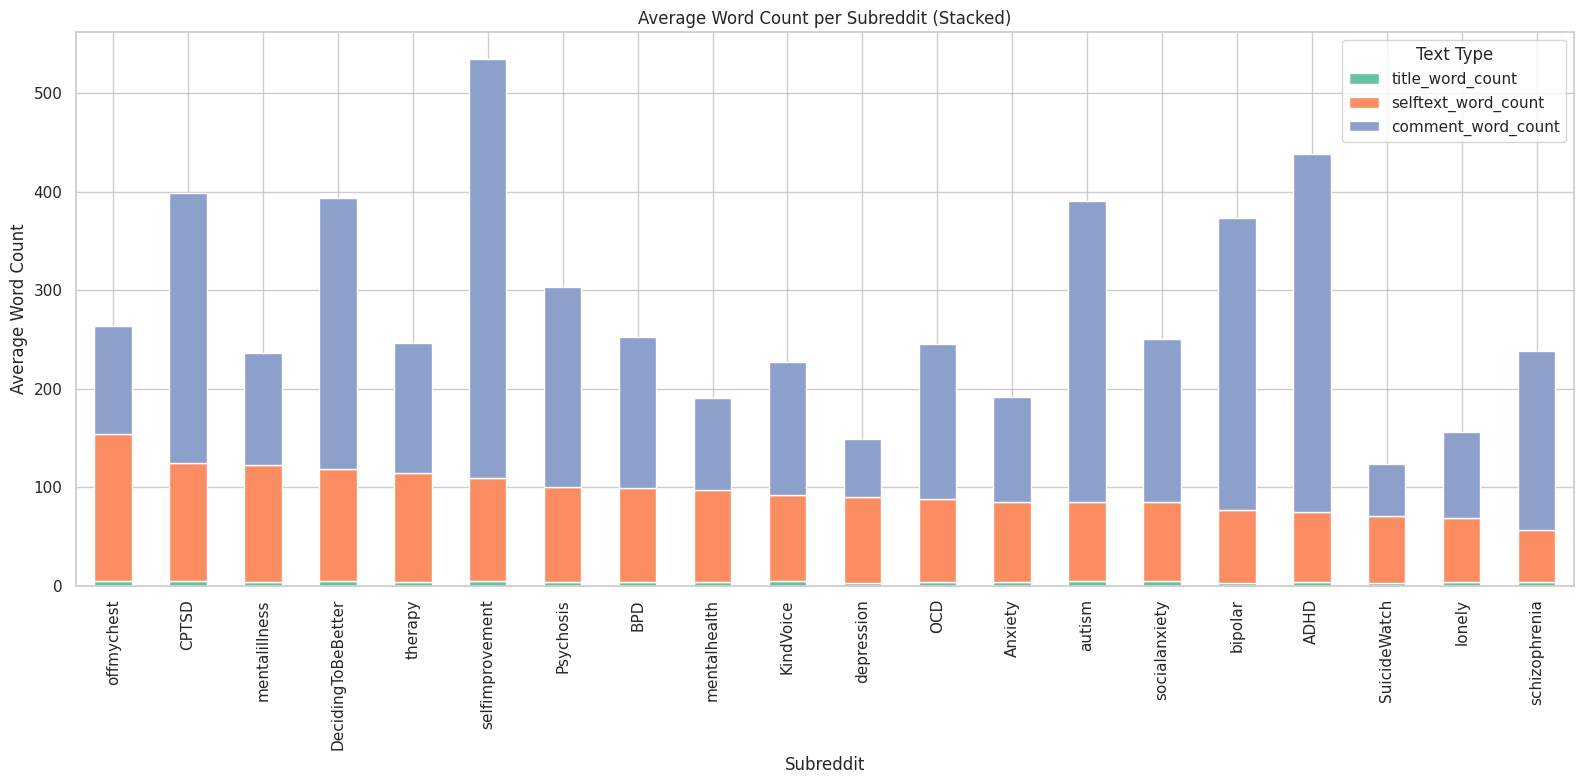

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate word counts
df_clean["title_word_count"] = df_clean["processed_title"].fillna("").apply(lambda x: len(x.split()))
df_clean["selftext_word_count"] = df_clean["processed_selftext"].fillna("").apply(lambda x: len(x.split()))
df_clean["comment_word_count"] = df_clean["processed_comments"].fillna("").apply(lambda x: len(x.split()))

# Group by subreddit and compute average word counts
avg_word_counts = df_clean.groupby("subreddit")[["title_word_count", "selftext_word_count", "comment_word_count"]].mean()

# Plot stacked bar chart
avg_word_counts.sort_values("selftext_word_count", ascending=False).plot(
    kind="bar",
    stacked=True,
    figsize=(16, 8),
    color=["#66c2a5", "#fc8d62", "#8da0cb"]
)

plt.title("Average Word Count per Subreddit (Stacked)")
plt.ylabel("Average Word Count")
plt.xlabel("Subreddit")
plt.xticks(rotation=90)
plt.legend(title="Text Type")
plt.tight_layout()
plt.show()




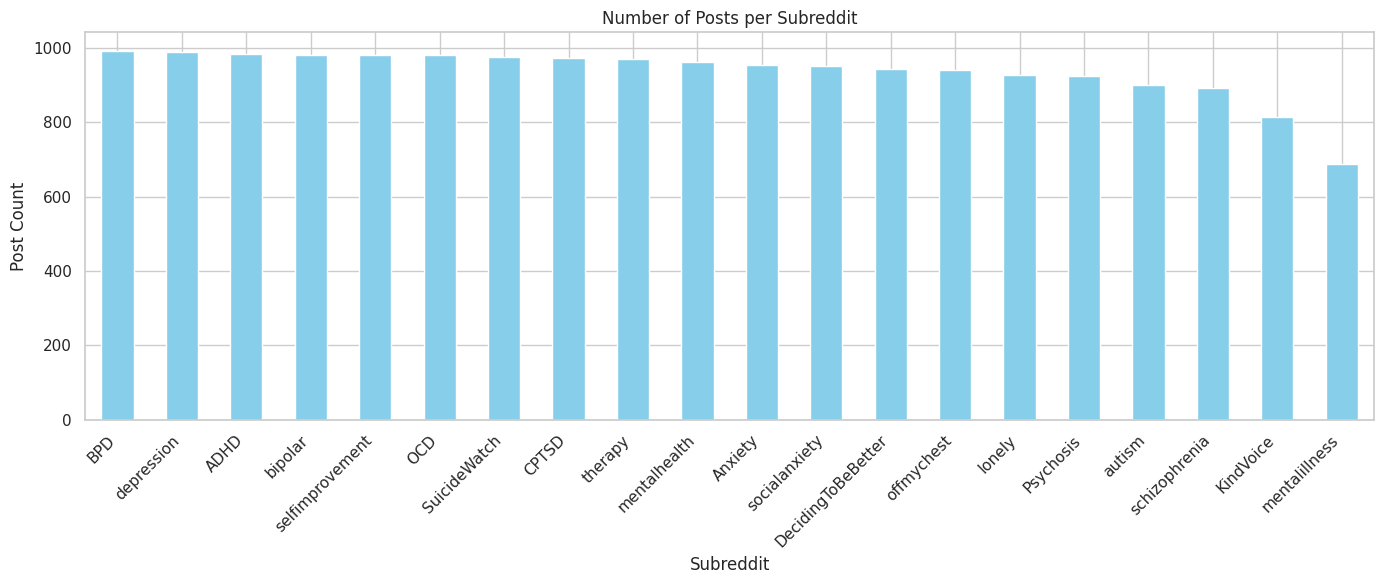

/tmp/ipython-input-13-864461893.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_word_counts.keys()), y=list(avg_word_counts.values()), palette='Set2')


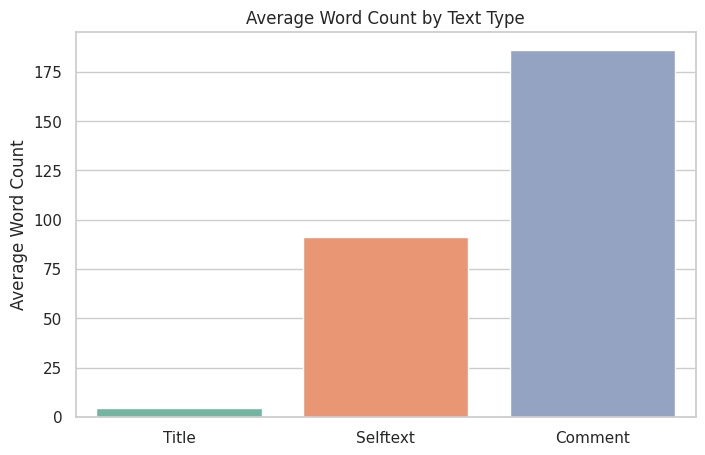

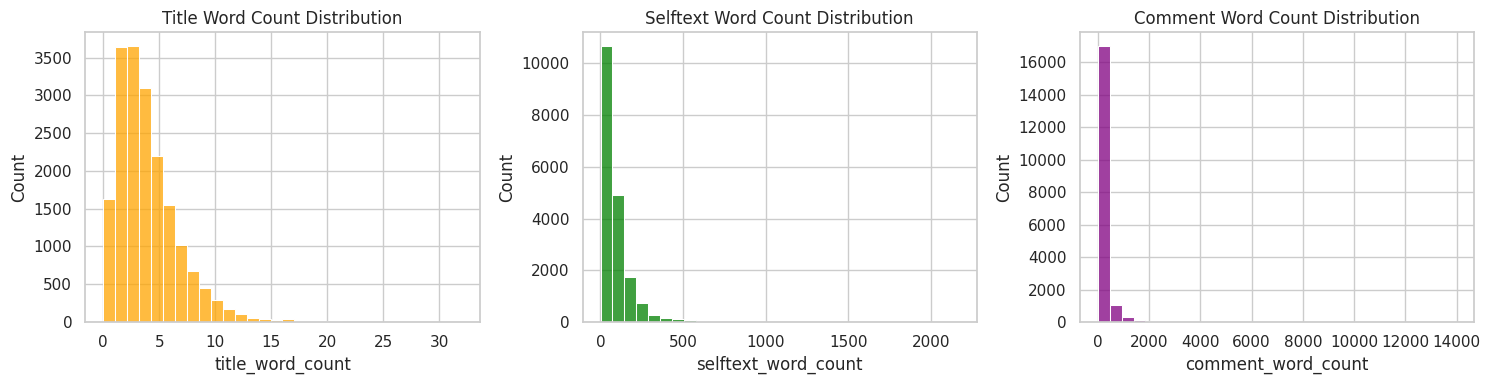

Missing values:
 title          0
selftext       0
comments    3584
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# ----------------------------------------
# 1. Subreddit distribution
# ----------------------------------------
plt.figure(figsize=(14, 6))
df_clean['subreddit'].value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Posts per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Post Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ----------------------------------------
# 2. Average word count per text field
# ----------------------------------------
df_clean['title_word_count'] = df_clean['processed_title'].fillna("").apply(lambda x: len(x.split()))
df_clean['selftext_word_count'] = df_clean['processed_selftext'].fillna("").apply(lambda x: len(x.split()))
df_clean['comment_word_count'] = df_clean['processed_comments'].fillna("").apply(lambda x: len(x.split()))

avg_word_counts = {
    'Title': df_clean['title_word_count'].mean(),
    'Selftext': df_clean['selftext_word_count'].mean(),
    'Comment': df_clean['comment_word_count'].mean()
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(avg_word_counts.keys()), y=list(avg_word_counts.values()), palette='Set2')
plt.title('Average Word Count by Text Type')
plt.ylabel('Average Word Count')
plt.show()

# ----------------------------------------
# 3. Word count histograms
# ----------------------------------------
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_clean['title_word_count'], bins=30, color='orange')
plt.title('Title Word Count Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df_clean['selftext_word_count'], bins=30, color='green')
plt.title('Selftext Word Count Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df_clean['comment_word_count'], bins=30, color='purple')
plt.title('Comment Word Count Distribution')

plt.tight_layout()
plt.show()

# ----------------------------------------
# 4. Missing value summary
# ----------------------------------------
missing_summary = df_clean[['title', 'selftext', 'comments']].isna().sum()
print("Missing values:\n", missing_summary)


In [ ]:
%pip install ace_tools

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


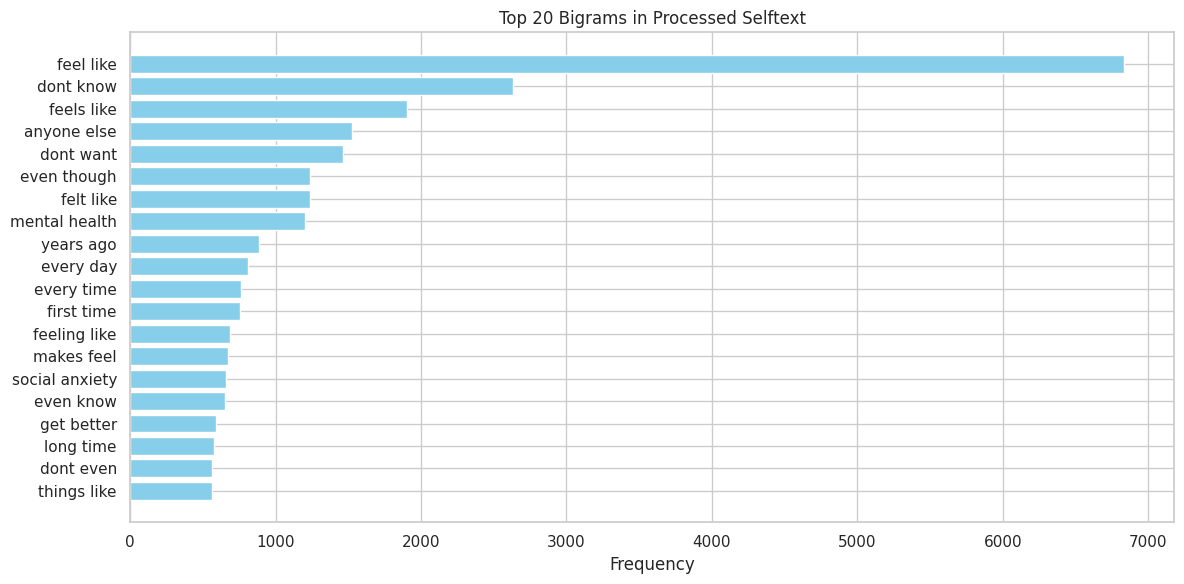

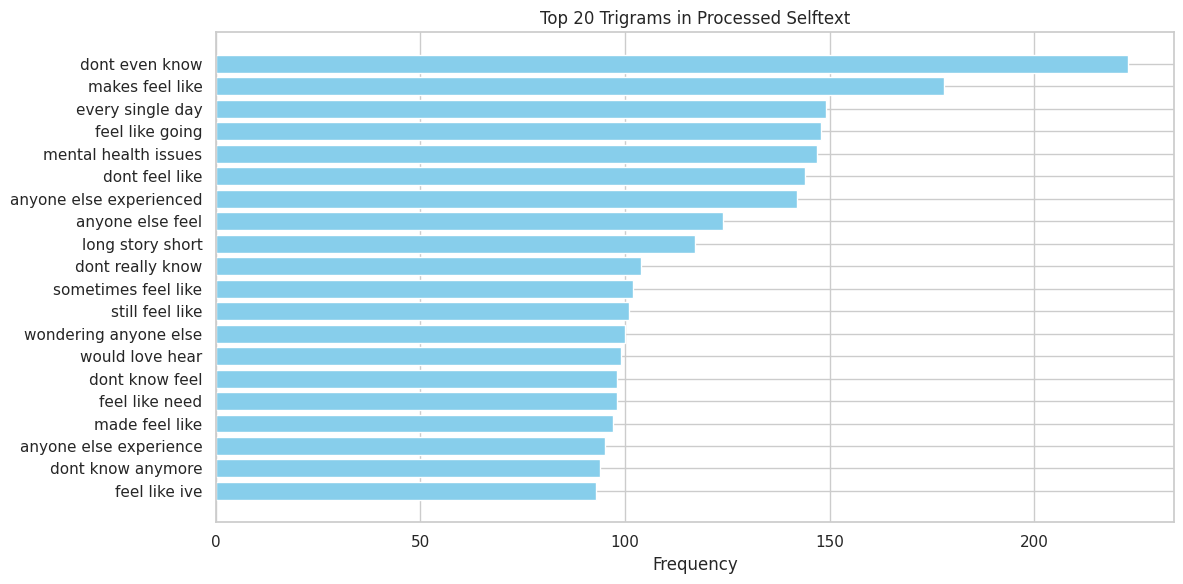

In [ ]:
import matplotlib.pyplot as plt
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Ensure punkt is downloaded
nltk.download('punkt_tab')

# Extract n-grams
def get_top_ngrams(df, column, n, top_n=20):
    ngram_list = []
    for text in df[column].dropna():
        tokens = word_tokenize(text)
        ngram_list.extend(ngrams(tokens, n))
    return Counter(ngram_list).most_common(top_n)

# Get top 20 bigrams and trigrams
top_bigrams = get_top_ngrams(df_clean, 'processed_selftext', 2)
top_trigrams = get_top_ngrams(df_clean, 'processed_selftext', 3)

# Helper function to plot n-grams
def plot_ngrams(ngrams_list, title):
    phrases = [' '.join(gram) for gram, count in ngrams_list]
    counts = [count for gram, count in ngrams_list]

    plt.figure(figsize=(12, 6))
    plt.barh(phrases[::-1], counts[::-1], color='skyblue')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot
plot_ngrams(top_bigrams, "Top 20 Bigrams in Processed Selftext")
plot_ngrams(top_trigrams, "Top 20 Trigrams in Processed Selftext")





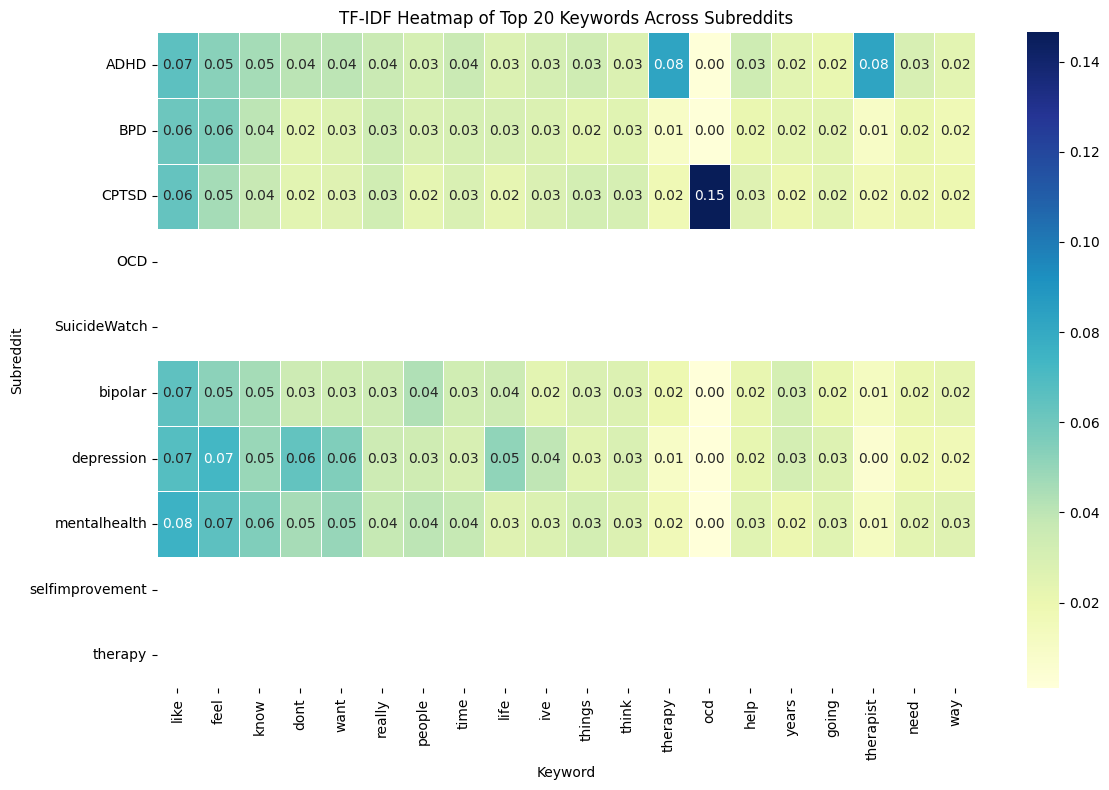

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load preprocessed data
df = pd.read_csv("reddit_mh_parallel_preprocessed-2.csv")
df.dropna(subset=['subreddit', 'processed_selftext'], inplace=True)

# Filter for main subreddits (optional: choose most frequent ones)
top_subs = df['subreddit'].value_counts().head(10).index.tolist()
df = df[df['subreddit'].isin(top_subs)]

# TF-IDF vectorization on processed_selftext
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['processed_selftext'].fillna(""))

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf = pd.concat([df[['subreddit']], tfidf_df], axis=1)

# Group by subreddit and compute average TF-IDF scores
subreddit_tfidf_avg = df_tfidf.groupby('subreddit').mean()

# Pick top N keywords with highest average tf-idf across subreddits
top_keywords = subreddit_tfidf_avg.mean().sort_values(ascending=False).head(20).index.tolist()
heatmap_data = subreddit_tfidf_avg[top_keywords]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".2f")
plt.title("TF-IDF Heatmap of Top 20 Keywords Across Subreddits")
plt.xlabel("Keyword")
plt.ylabel("Subreddit")
plt.tight_layout()
plt.show()
